# 6.6 Sourcing & Analysing Time Series Data

## Contents:

### 01. Importing Libraries & Data

### 02. Subsetting, Wrangling, and Cleaning Time-Series Data

### 03. Time Series Analysis: Decomposition

### 04. Testing for Stationarity

### 05. Stationarising the Citi Biki Data

#### 01. Importing Libraries & Data

In [213]:
# Import library
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.
import nasdaqdatalink

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how my plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [214]:
# Create path
path = "/Users/yaseminmustafa/Desktop/CareerFoundry/Exercise 6"

In [215]:
# Import cleaned bike data
df = pd.read_csv(os.path.join(path, '6.1', 'Open_Source_Data', 'cleaned_bike_data.csv'))

In [216]:
# Check data
df.head(100)

,trip_id,bike_id,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender,birth_year_missing
0,LnQzQk,16013.0,Mon,18.0,09/09/2013 18:18,523.0,W 38 St & 8 Ave,40.754666,-73.991382,09/09/2013 18:35,334.0,W 20 St & 7 Ave,40.742388,-73.997262,993.0,Subscriber,1968.0,female,False
1,IL9boN,15230.0,Thu,18.0,12/09/2013 18:38,257.0,Lispenard St & Broadway,40.719392,-74.002472,12/09/2013 18:48,236.0,St Marks Pl & 2 Ave,40.728419,-73.987140,581.0,Subscriber,1983.0,male,False
2,46clGB,17942.0,Wed,19.0,18/09/2013 19:44,479.0,9 Ave & W 45 St,40.760193,-73.991255,18/09/2013 19:50,513.0,W 56 St & 10 Ave,40.768254,-73.988639,361.0,Subscriber,1989.0,male,False
3,v7vdFt,19683.0,Sat,11.0,28/09/2013 11:54,527.0,E 33 St & 1 Ave,40.743156,-73.974347,28/09/2013 12:03,441.0,E 52 St & 2 Ave,40.756014,-73.967416,561.0,Subscriber,1988.0,female,False
4,HbKJBz,14581.0,Fri,22.0,27/09/2013 22:01,293.0,Lafayette St & E 8 St,40.730287,-73.990765,27/09/2013 22:08,432.0,E 7 St & Avenue A,40.726218,-73.983799,427.0,Subscriber,1986.0,female,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,CKH9UB,16225.0,Thu,18.0,19/09/2013 18:02,164.0,E 47 St & 2 Ave,40.753231,-73.970325,19/09/2013 18:22,383.0,Greenwich Ave & Charles St,40.735238,-74.000271,1202.0,Subscriber,1965.0,male,False
96,R0voFx,15145.0,Fri,23.0,20/09/2013 23:11,380.0,W 4 St & 7 Ave S,40.734011,-74.002939,20/09/2013 23:22,496.0,E 16 St & 5 Ave,40.737262,-73.992390,681.0,Subscriber,1967.0,male,False
97,3wXnXT,19848.0,Thu,8.0,12/09/2013 08:49,514.0,12 Ave & W 40 St,40.760875,-74.002777,12/09/2013 09:07,472.0,E 32 St & Park Ave,40.745712,-73.981948,1049.0,Subscriber,1981.0,female,False
98,5KwnRS,19205.0,Mon,19.0,09/09/2013 19:54,290.0,2 Ave & E 58 St,40.760203,-73.964785,09/09/2013 20:21,375.0,Mercer St & Bleecker St,40.726794,-73.996951,1649.0,Subscriber,1988.0,female,False


In [217]:
# Check shape
df.shape

(47063, 19)

In [218]:
# check earliest and latest date
print(df['start_time'].min())
print(df['start_time'].max())

01/09/2013 00:00
30/09/2013 23:58


In [219]:
# Check column names
df.columns

Index(['trip_id', 'bike_id', 'weekday', 'start_hour', 'start_time',
       'start_station_id', 'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_time', 'end_station_id',
       'end_station_name', 'end_station_latitude', 'end_station_longitude',
       'trip_duration', 'subscriber', 'birth_year', 'gender',
       'birth_year_missing'],
      dtype='object')

In [220]:
# Convert 'start_time' to datetime and set it as the DataFrame index
df['start_time'] = pd.to_datetime(df['start_time'], dayfirst=True)
df = df.set_index('start_time').sort_index()

# Resample the entire dataset by hour and calculate the average trip duration for each hour
ts_hourly_full = df['trip_duration'].resample('H').mean().to_frame(name='AvgTripDuration')

# Display the first 24 hourly averages to inspect the data
print(ts_hourly_full.head(24))

                     AvgTripDuration
start_time                          
2013-09-01 00:00:00       919.350000
2013-09-01 01:00:00       878.437500
2013-09-01 02:00:00       813.111111
2013-09-01 03:00:00      1222.000000
2013-09-01 04:00:00       956.000000
2013-09-01 05:00:00       939.333333
2013-09-01 06:00:00       896.375000
2013-09-01 07:00:00       630.666667
2013-09-01 08:00:00       746.684211
2013-09-01 09:00:00       789.361111
2013-09-01 10:00:00       799.269231
2013-09-01 11:00:00       790.897959
2013-09-01 12:00:00       824.842857
2013-09-01 13:00:00       869.811111
2013-09-01 14:00:00       873.878049
2013-09-01 15:00:00       954.451923
2013-09-01 16:00:00      1006.063830
2013-09-01 17:00:00       937.404040
2013-09-01 18:00:00       958.651685
2013-09-01 19:00:00       855.076923
2013-09-01 20:00:00       924.166667
2013-09-01 21:00:00       847.861111
2013-09-01 22:00:00       661.692308
2013-09-01 23:00:00       874.500000


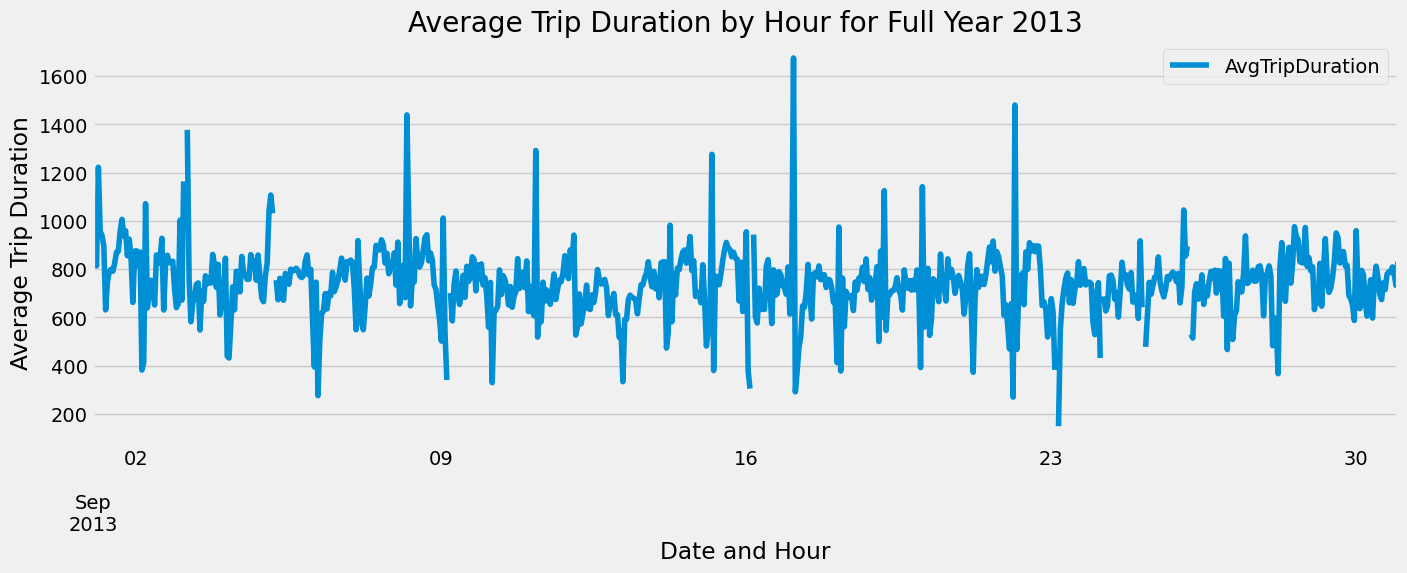

In [221]:
ts_hourly_full.plot(figsize=(15,5))
plt.title("Average Trip Duration by Hour for Full Year 2013")
plt.xlabel("Date and Hour")
plt.ylabel("Average Trip Duration")
plt.show()

In [222]:
# Ensure index is a proper DatetimeIndex
print(type(ts_hourly_full.index))
# Should print: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [223]:
print(df.index.min())
print(df.index.max())

2013-09-01 00:00:00
2013-09-30 23:58:00


#### 02. Subsetting, Wrangling, and Cleaning Time-Series Data

In [224]:
print("Start date:", df.index.min())
print("End date:", df.index.max())

Start date: 2013-09-01 00:00:00
End date: 2013-09-30 23:58:00


In [225]:
# Resample by day and calculate the average trip duration per day
ts_daily = df['trip_duration'].resample('D').mean().to_frame(name='AvgTripDuration')

# Check the first few days
print(ts_daily.head())

            AvgTripDuration
start_time                 
2013-09-01       884.229224
2013-09-02       796.971992
2013-09-03       737.279667
2013-09-04       778.015653
2013-09-05       773.310098


##### **I focused on September 2013, which is the full range of available data in the dataset, ensuring I only analyse actual historical data without mixing irrelevant periods or forecasted values. Since the data covers just one month, I chose to aggregate the trip durations by day instead of by hour. This daily aggregation smooths out the noisy hourly fluctuations and reveals clearer trends and patterns over time. By doing this, I maintain a balance between capturing meaningful temporal dynamics and reducing random variation that could obscure insights or bias forecasting models. This approach provides a more stable basis for time series analysis and forecasting within the actual historical domain of the data.**

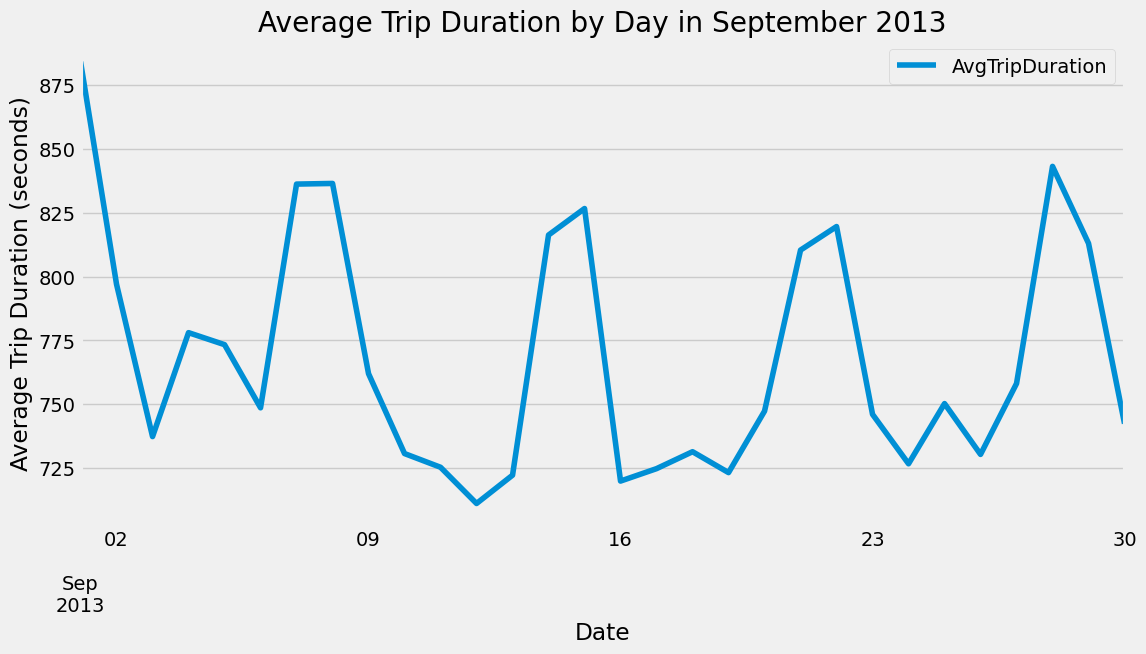

In [228]:
ts_daily.plot(figsize=(12,6))
plt.title("Average Trip Duration by Day in September 2013")
plt.xlabel("Date")
plt.ylabel("Average Trip Duration (seconds)")
plt.grid(True)
plt.show()

#### 03. Time Series Analysis: Decomposition

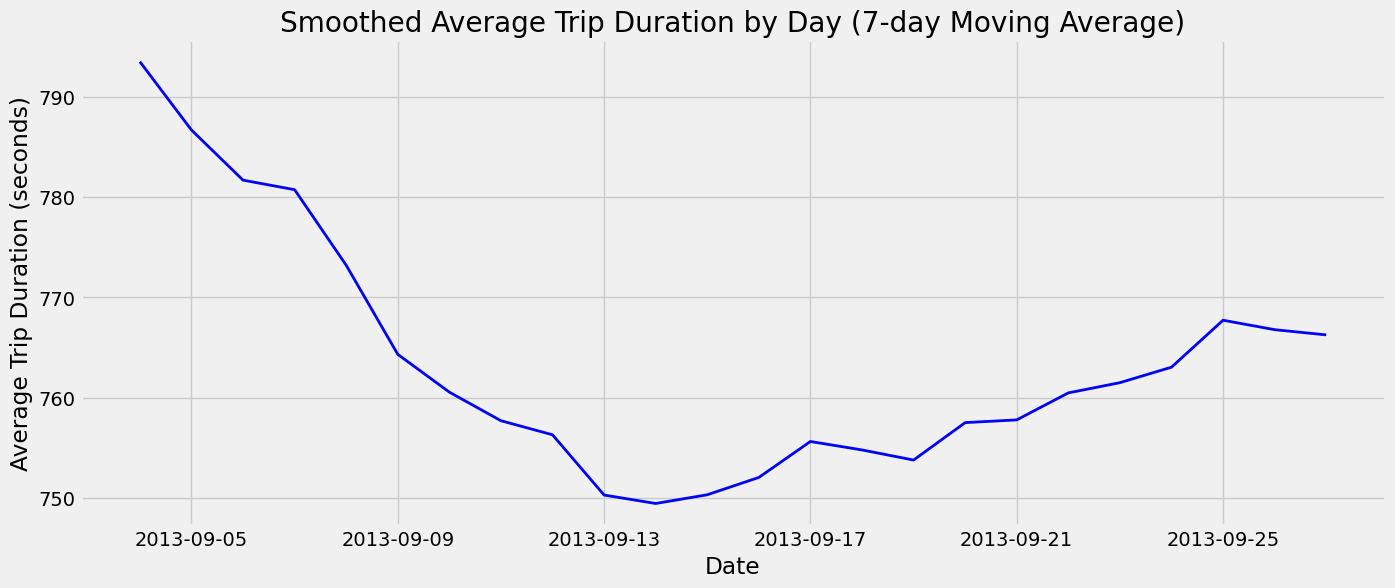

In [242]:
# Calculate the 7-day moving average to smooth daily trip durations
ts_daily['Smoothed'] = ts_daily['AvgTripDuration'].rolling(window=7, center=True).mean()

# Plot the smoothed daily average trip durations
plt.figure(figsize=(15,6))
plt.plot(ts_daily.index, ts_daily['Smoothed'], color='blue', linewidth=2)
plt.title("Smoothed Average Trip Duration by Day (7-day Moving Average)")
plt.xlabel("Date")
plt.ylabel("Average Trip Duration (seconds)")
plt.grid(True)
plt.show()

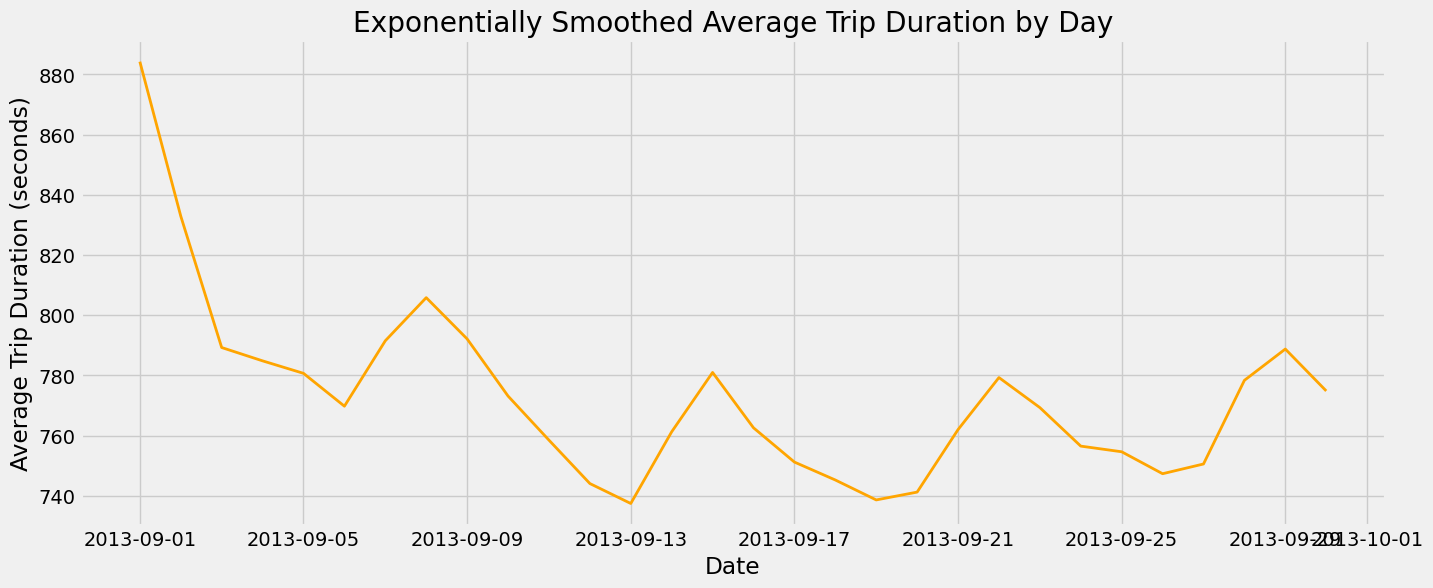

In [243]:
# Apply exponential smoothing with a smoothing factor alpha (e.g., 0.3)
ts_daily['ExpSmoothed'] = ts_daily['AvgTripDuration'].ewm(alpha=0.3).mean()

# Plot the exponentially smoothed daily average trip durations
plt.figure(figsize=(15,6))
plt.plot(ts_daily.index, ts_daily['ExpSmoothed'], color='orange', linewidth=2)
plt.title("Exponentially Smoothed Average Trip Duration by Day")
plt.xlabel("Date")
plt.ylabel("Average Trip Duration (seconds)")
plt.grid(True)
plt.show()

##### **Since my data is daily averages with noticeable fluctuations, smoothing helps reveal the underlying trends more clearly. I chose moving average smoothing because it smooths out short-term noise and highlights longer-term patterns without reacting too quickly to sudden changes. This approach is useful for understanding general trends and seasonal effects in the data. However, for forecasting or capturing more recent shifts, exponential smoothing could be beneficial since it gives more weight to recent observations and adapts faster to changes. For now, moving average smoothing provides a clear and stable view of trip duration trends over the period.**

In [244]:
# Decompose the time series using an additive model
# Use the original daily average trip duration series (not the smoothed one) for decomposition
decomposition = sm.tsa.seasonal_decompose(ts_daily['AvgTripDuration'], model='multiplicative')

In [245]:
from pylab import rcParams # This will define a fixed size for all special charts.
rcParams['figure.figsize'] = 18, 7

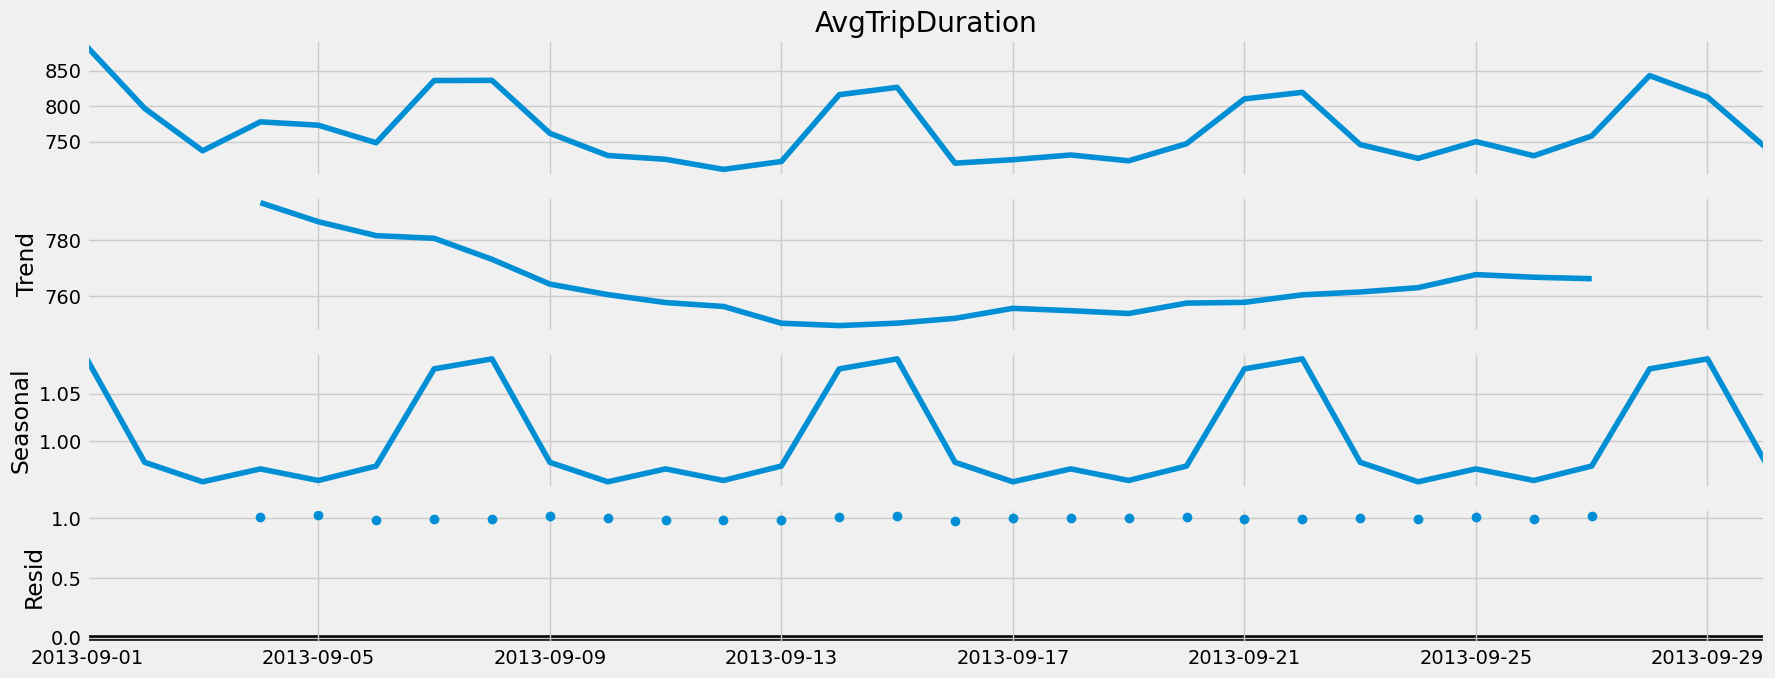

In [246]:
# Plot the separate components
decomposition.plot()
plt.show()

##### **The first plot in the decomposition output is the observed data, which shows the original values of the daily average trip durations. This includes all components — trend, seasonality, and residual (noise). The second plot shows the trend component, which isolates the long-term direction of the data. In this case, the trend line gradually declines from around 2013-09-05, suggesting a reduction in average trip duration as the month progresses. This decline is not perfectly linear but shows a general downward slope. Around 2013-09-21, there is a subtle upward movement, indicating a potential shift or recovery in trip duration patterns toward the end of the month. The third plot represents the seasonality component. Here, we observe repeating wave-like patterns resembling inverted buckets, indicating that average trip durations follow a recurring daily cycle over the short-term. This suggests that users tend to ride longer or shorter trips depending on specific days in the week, hinting at behavioural regularities, such as weekend versus weekday usage patterns. The final plot shows the residual (or noise) component, which captures any random variability left over after removing the trend and seasonal effects. The residuals in this decomposition are relatively small, indicating that most of the variability in the data is explained by the trend and seasonality. There are no major unexplained spikes, supporting the effectiveness of the decomposition model and the earlier smoothing applied. Overall, the decomposition highlights that the dataset exhibits a clear trend and regular seasonality, with minimal residual noise. This suggests that a multiplicative model was appropriate, and the data’s structure is well-suited for further forecasting or analysis based on these components.**

#### 04. Testing for Stationarity

In [247]:
from statsmodels.tsa.stattools import adfuller

def dickey_fuller(timeseries):
    print('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries.dropna(), autolag='AIC')  # dropna() to avoid issues with missing values
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key, value in test[4].items():
        result[f'Critical Value ({key})'] = value
    print(result)

# Run the test on the original daily average trip duration series
dickey_fuller(ts_daily['AvgTripDuration'])

Dickey-Fuller Stationarity test:
Test Statistic                 -2.252483
p-value                         0.187751
Number of Lags Used             8.000000
Number of Observations Used    21.000000
Critical Value (1%)            -3.788386
Critical Value (5%)            -3.013098
Critical Value (10%)           -2.646397
dtype: float64


##### **I conducted a Dickey-Fuller test to evaluate whether my time series data is stationary. The p-value was 0.188, which is greater than 0.05, and the test statistic (-2.25) was higher than all the critical values at 1%, 5%, and 10% confidence levels. Based on these results, I fail to reject the null hypothesis, which means my data is non-stationary. This suggests that the statistical properties of the time series—such as its mean and variance—change over time. Because stationarity is a requirement for many forecasting models, the next step will be to difference the data or apply a transformation to achieve stationarity.**

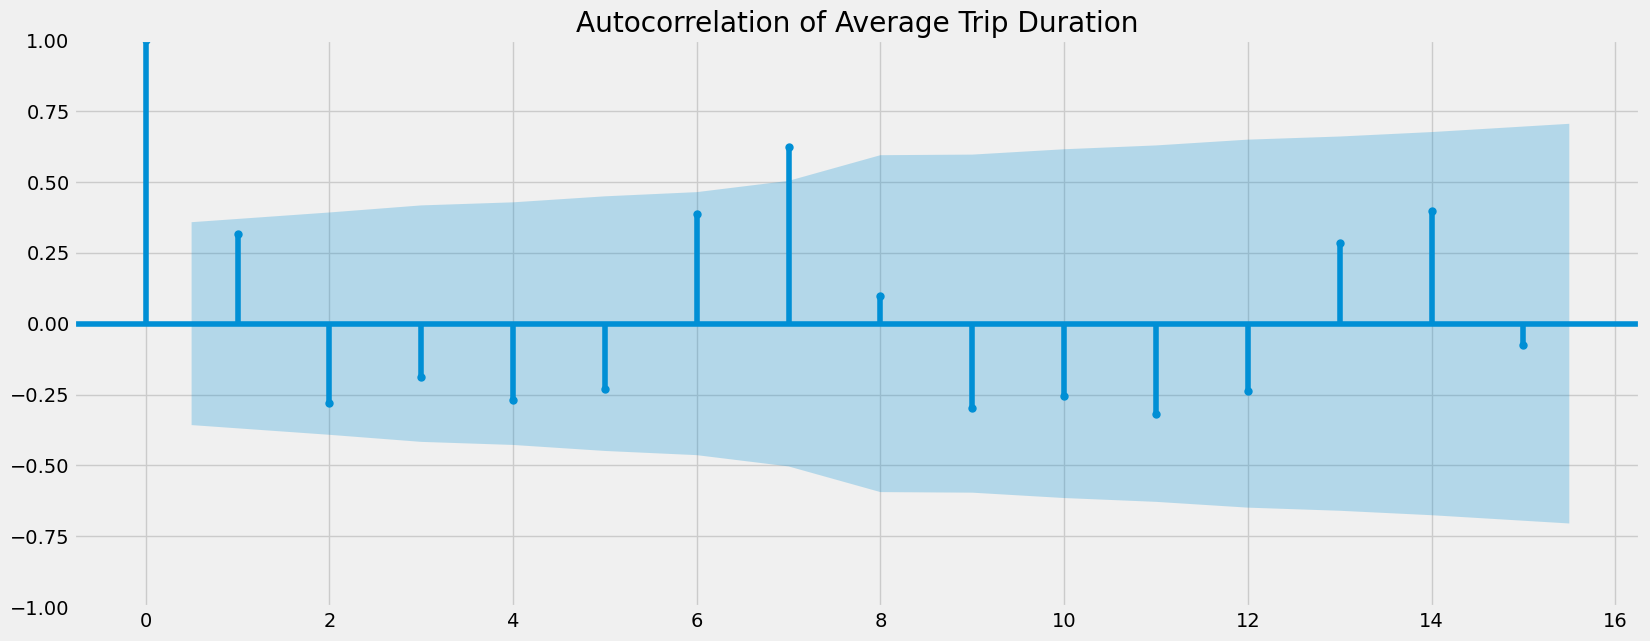

In [249]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Plot autocorrelation for the average trip duration
plot_acf(ts_daily['AvgTripDuration'].dropna())
plt.title('Autocorrelation of Average Trip Duration')
plt.show()

#### 05. Stationarising the Citi Biki Data

In [250]:
# Apply differencing to make the time series stationary
ts_diff = ts_daily['AvgTripDuration'] - ts_daily['AvgTripDuration'].shift(1)

In [251]:
# Drop missing values created by differencing
ts_diff.dropna(inplace=True)

In [253]:
# Check data
ts_diff.head()

start_time
2013-09-02   -87.257232
2013-09-03   -59.692325
2013-09-04    40.735986
2013-09-05    -4.705556
2013-09-06   -24.749678
Freq: D, Name: AvgTripDuration, dtype: float64

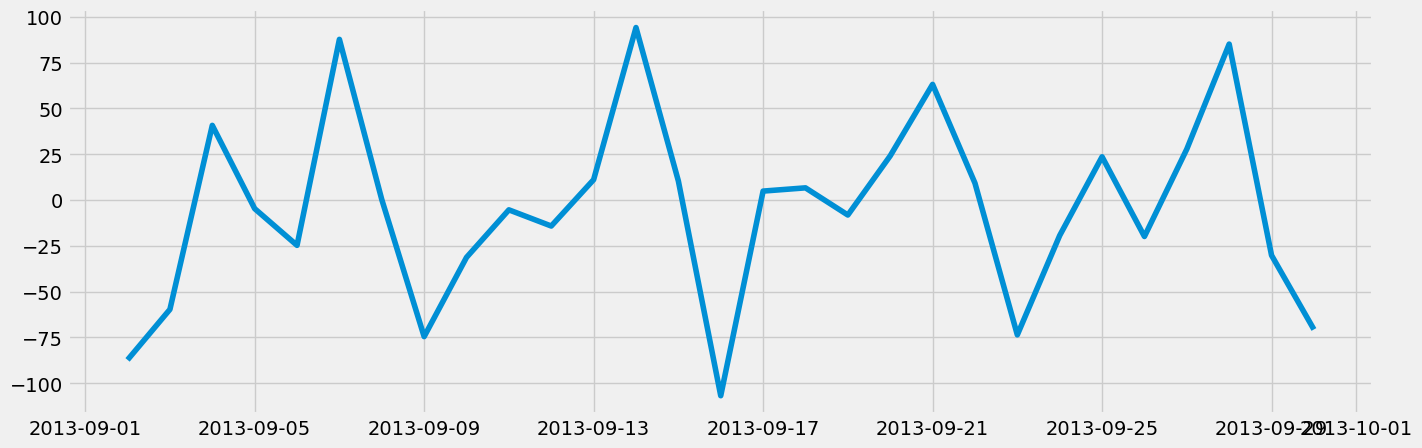

In [255]:
# Check out what the differencing did to the time-series curve
plt.figure(figsize=(15,5), dpi=100)
plt.plot(ts_diff)

In [257]:
# run the Dickey Fuller Test
dickey_fuller(ts_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -1.095194
p-value                         0.716985
Number of Lags Used             9.000000
Number of Observations Used    19.000000
Critical Value (1%)            -3.832603
Critical Value (5%)            -3.031227
Critical Value (10%)           -2.655520
dtype: float64


##### **After applying one round of differencing, the test statistic moved closer to zero and the p-value increased significantly, indicating that the transformation did not improve stationarity. As a result, we still fail to reject the null hypothesis, meaning the data remains non-stationary and a single round of differencing was not sufficient.**

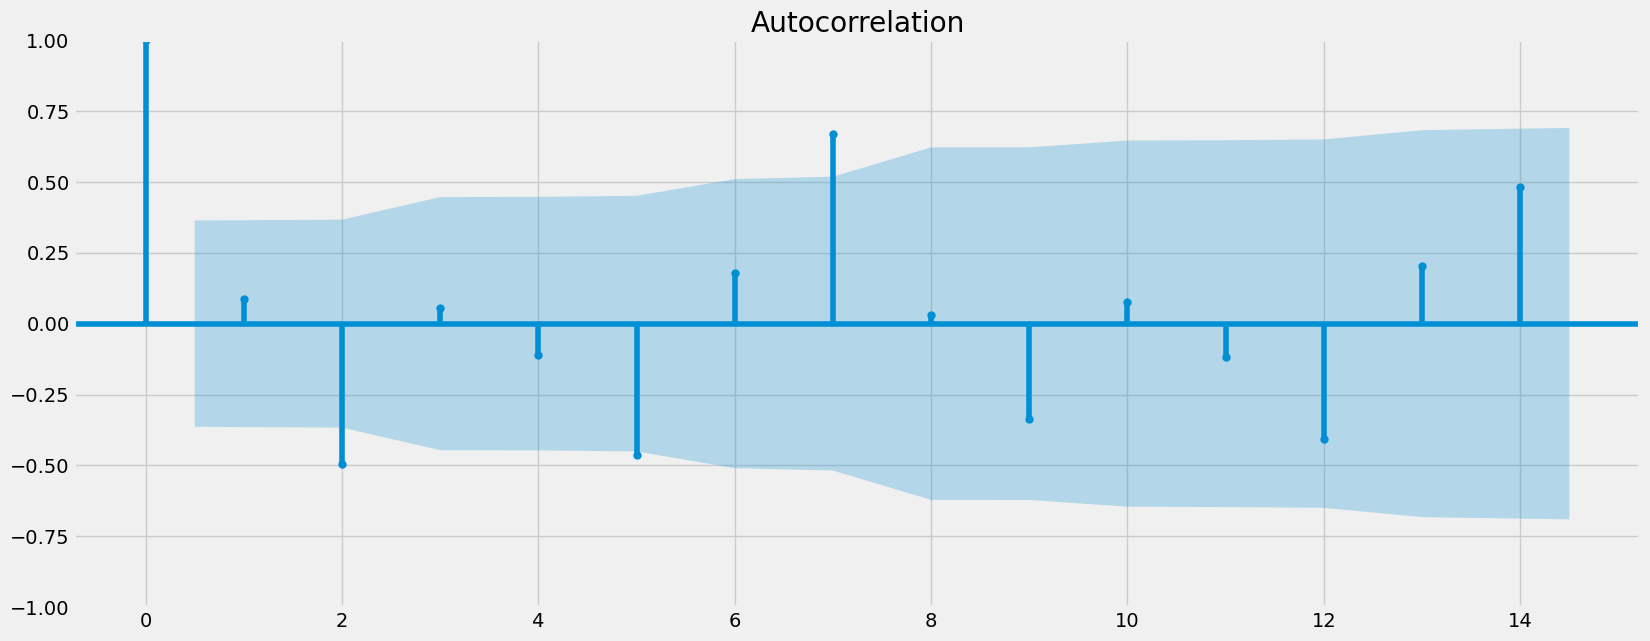

In [258]:
# Plot autocorrelation
plot_acf(ts_diff)
plt.show()

In [259]:
# Apply second round of differencing
ts_diff2 = ts_diff - ts_diff.shift(1)

# Drop any resulting NaN values
ts_diff2 = ts_diff2.dropna()

# Preview the result
ts_diff2.head()

start_time
2013-09-03     27.564907
2013-09-04    100.428311
2013-09-05    -45.441542
2013-09-06    -20.044123
2013-09-07    112.436231
Freq: D, Name: AvgTripDuration, dtype: float64

In [260]:
# Run Dickey-Fuller test on the twice-differenced series
dickey_fuller(ts_diff2)

Dickey-Fuller Stationarity test:
Test Statistic                 -4.100003
p-value                         0.000969
Number of Lags Used             8.000000
Number of Observations Used    19.000000
Critical Value (1%)            -3.832603
Critical Value (5%)            -3.031227
Critical Value (10%)           -2.655520
dtype: float64


##### **The null hypothesis of the Dickey-Fuller test assumes that the time series contains a unit root, meaning it is non-stationary. In this case, the test statistic is -4.100003, which is smaller than the critical values at the 1%, 5%, and 10% significance levels (-3.832603, -3.031227, and -2.655520, respectively). Additionally, the p-value is 0.000969, well below the typical 0.05 threshold for significance. Because the test statistic is less than the critical values and the p-value is low, we reject the null hypothesis. This indicates that the twice-differenced time series is stationary, meaning it no longer contains a unit root and its statistical properties such as mean and variance remain constant over time. Consequently, this data is now appropriate for time series forecasting models that require stationarity.**

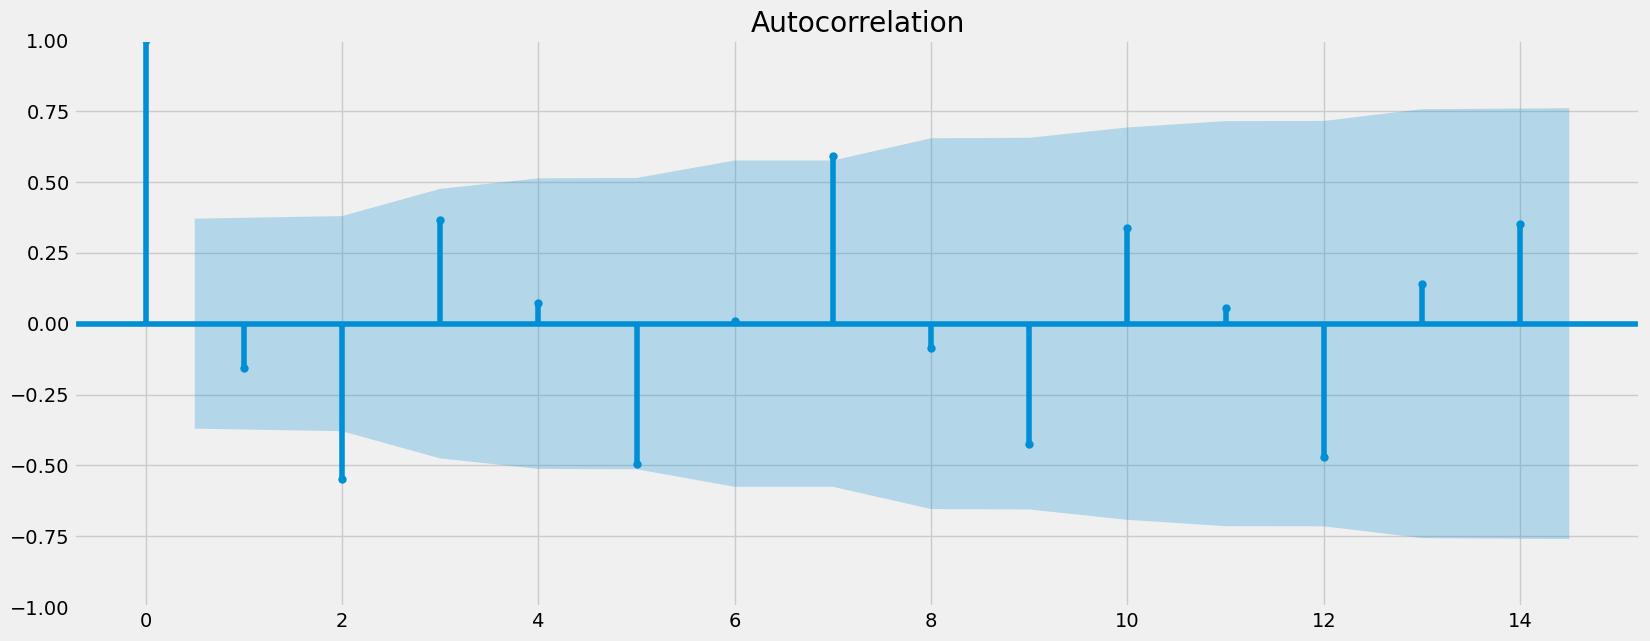

In [261]:
# Plot autocorrelation
plot_acf(ts_diff2)
plt.show()